In [12]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    num1 : int
    num2 : int
    num3 : int
    num4 : int
    sym1 : str
    sym2 : str
    sym3 : str
    final1 : int
    final2 : int
    final : int 
    
    #structure
    #final1 = num1 sym1 num2 ex : 2+3
    #final2 = num3 sym2 num4 ex : 4-4
    #final = final1 sym3 final2 ex: 5*0
    
def adder_one(state:AgentState) -> AgentState:
    state["final1"] = state["num1"] + state["num2"]
    return state 

def adder_two(state:AgentState) -> AgentState:
    state["final2"] = state["num3"] + state["num4"]
    return state 

def adder_three(state:AgentState) -> AgentState:
    state["final"] = state["final1"] + state["final2"]
    return state

def sub_one(state:AgentState) -> AgentState:
    state["final1"] = state["num1"] - state["num2"]
    return state 

def sub_two(state:AgentState) -> AgentState:
    state["final2"] = state["num3"] - state["num4"]
    return state 

def sub_three(state:AgentState) -> AgentState:
    state["final"] = state["final1"] - state["final2"]
    return state

def mul_one(state:AgentState) -> AgentState:
    state["final1"] = state["num1"] * state["num2"]
    return state 

def mul_two(state:AgentState) -> AgentState:
    state["final2"] = state["num3"] * state["num4"]
    return state

def mul_three(state:AgentState) -> AgentState:
    state["final"] = state["final1"] * state["final2"]
    return state

def decide_next_node_one(state:AgentState) -> AgentState:
    if state["sym1"] == "+":
        return "add_one"
    if state["sym1"] == "-":
        return "sub_one"
    if state["sym1"] == "*":
        return "mul_one"

def decide_next_node_two(state:AgentState) -> AgentState:
    if state["sym2"] == "+":
        return "add_two"
    if state["sym2"] == "-":
        return "sub_two"
    if state["sym2"] == "*":
        return "mul_two"
    
def decide_next_node_three(state:AgentState) -> AgentState:
    if state["sym3"] == "+":
        return "add_three"
    if state["sym3"] == "-":
        return "sub_three"
    if state["sym3"] == "*":
        return "mul_three"
    

In [13]:
graph = StateGraph(AgentState)

graph.add_node("adder_one", adder_one)
graph.add_node("adder_two", adder_two)
graph.add_node("adder_three", adder_three)

graph.add_node("sub_one", sub_one)
graph.add_node("sub_two", sub_two)
graph.add_node("sub_three", sub_three)

graph.add_node("mul_one", mul_one)
graph.add_node("mul_two", mul_two)
graph.add_node("mul_three", mul_three)

graph.add_node("router_one", lambda state:state)
graph.add_node("router_two", lambda state:state)
graph.add_node("router_three", lambda state:state)

In [14]:
graph.add_edge(START, "router_one")

graph.add_conditional_edges(
    "router_one",
    decide_next_node_one,
    {
        "add_one" : "adder_one",
        "sub_one" : "sub_one",
        "mul_one" : "mul_one"
    }
)

graph.add_edge("adder_one", "router_two")
graph.add_edge("sub_one", "router_two")
graph.add_edge("mul_one", "router_two")

graph.add_conditional_edges(
    "router_two",
    decide_next_node_two,
    {
        "add_two" : "adder_two",
        "sub_two" : "sub_two",
        "mul_two" : "mul_two"
    }
)

graph.add_edge("adder_two", "router_three")
graph.add_edge("sub_two", "router_three")
graph.add_edge("mul_two", "router_three")

graph.add_conditional_edges(
    "router_three",
    decide_next_node_three,
    {
        "add_three" : "adder_three",
        "sub_three" : "sub_three",
        "mul_three" : "mul_three"
    }
)

graph.add_edge("adder_three", END)
graph.add_edge("sub_three", END)
graph.add_edge("mul_three", END)

app = graph.compile()

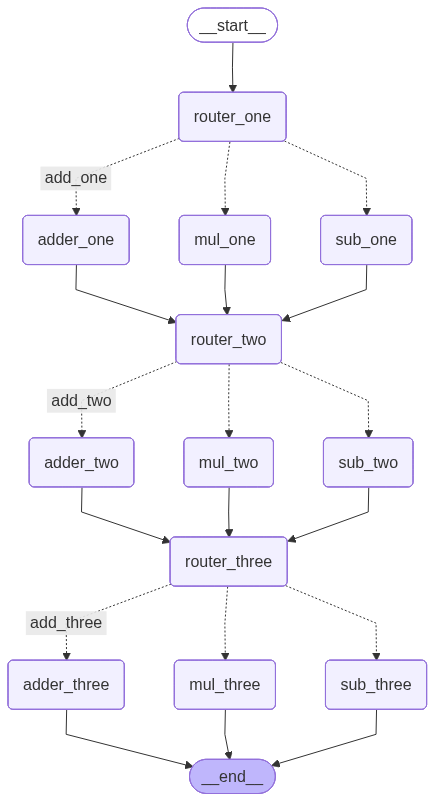

In [15]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [16]:
initial_state = AgentState(num1 = 9, num2 = 8, sym1="+", num3=6, num4=1, sym2="-", sym3="*")
print(app.invoke(initial_state))


{'num1': 9, 'num2': 8, 'num3': 6, 'num4': 1, 'sym1': '+', 'sym2': '-', 'sym3': '*', 'final1': 17, 'final2': 5, 'final': 85}
